# 🌀 사인파 임베딩

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/Generative_Deep_Learning_2nd_Edition/blob/main/notebooks/08_diffusion/01_ddm/sinusoidal_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-colorblind")

In [2]:
frequencies = np.exp(
    np.linspace(
        np.log(1),
        np.log(1000),
        32 // 2,
    )
)

In [3]:
embedding_list = []
for y in np.arange(0, 1, 0.01):
    x = np.array([[[[y]]]]) # noise_variances와 같은 (1, 1, 1) 크기 배열로 변환합니다.
    angular_speeds = 2.0 * math.pi * frequencies
    embeddings = np.concatenate(
        [np.sin(angular_speeds * x), np.cos(angular_speeds * x)], axis=3
    )
    embedding_list.append(embeddings[0][0][0])
embedding_array = np.transpose(embedding_list)

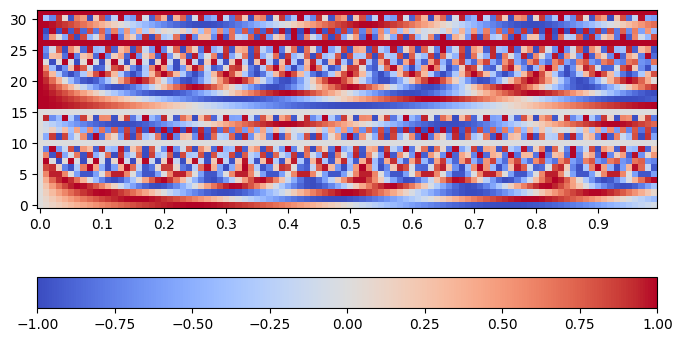

In [4]:
plt.figure(figsize=(8, 6))
plt.imshow(
    embedding_array, cmap="coolwarm", interpolation="nearest", origin="lower"
)
plt.xticks(np.arange(0, 100, 10), np.round(np.arange(0, 1, 0.1), 2))
plt.colorbar(location='bottom')
plt.show()

In [5]:
def positionalencoding1d(d_model, length):
    """
    :param d_model: 모델의 차원
    :param length: 위치 길이
    :return: length*d_model 크기의 위치 행렬
    """
    if d_model % 2 != 0:
        raise ValueError(
            "Cannot use sin/cos positional encoding with "
            "odd dim (got dim={:d})".format(d_model)
        )
    pe = np.zeros((length, d_model))
    position = np.array(list([x] for x in np.arange(0, length)))
    div_term = np.exp(
        (np.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
    )
    pe[:, : d_model // 2] = np.sin(position * div_term)
    pe[:, d_model // 2 :] = np.cos(position * div_term)

    return pe

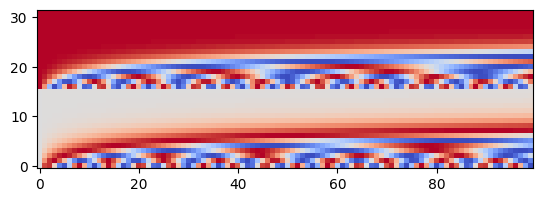

In [6]:
out = np.transpose(positionalencoding1d(32, 100))
plt.imshow(out, cmap="coolwarm", interpolation="nearest", origin="lower")
plt.show()